This
notebook
will
help
you
derive
the
emergent
network
for a given quantum circuit, return back a list of connectivities, do some circuit statistics and write the Bernoulli network for a given evolution.


In [76]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '..')
# for saving
import os
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
from src import setup
# setup.use_gpu()
from collections import defaultdict
occurrences = defaultdict(int)

In [77]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '../..')
import h5py
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from src import ket as ket
from src import density_matrix as DM
from collections import Counter
import matplotlib.cm as cm
from scipy.optimize import curve_fit
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
import matplotlib.colors as mcolors
import h5py


Load data for a given number of trials. The data is stored in HDF5 files, and we will load it into a dictionary format for easy access.

In [78]:
newdata_two_trials = dict(h5py.File("../../data/random_two_trials/random_two_trials.hdf5"))
newdata_five_trials = dict(h5py.File("../../data/random_five_trials/random_five_trials.hdf5"))
newdata_ten_trials = dict(h5py.File("../../data/random_ten_trials/random_ten_trials.hdf5"))
newdata_twentyfive_trials = dict(h5py.File("../../data/random_twentyfive_trials/random_twentyfive_trials.hdf5"))


Code to load the orders_list from the HDF5 file. The orders_list is stored in a specific group structure based on the parameters provided.

In [79]:
def load_orders_list(file_path: str, num_qubits, connectivity, unitary_energy_subspace, unitary_seed, order_rule_name: str):
    # Create an empty dictionary to hold orders_list
    orders_list = []

    with h5py.File(file_path, 'r') as file:
        # Construct the path to the specific group where orders_list is stored
        group_name = f"{num_qubits} qubits/{connectivity} connectivity/unitary energy subspace {unitary_energy_subspace}/unitary seed {unitary_seed}/ordering seed {order_rule_name}/previous_order"

        # Check if the group exists
        if group_name in file:
            group = file[group_name]
            for time_index in group:
                # Assuming the order data is stored in a dataset named 'data'
                orders_list.append(group[time_index]['data'][()])
        else:
            print(f"Group '{group_name}' not found in file.")

    return orders_list

Code to set the parameters and load the orders_list for different trial counts. The parameters include the number of qubits, connectivity, unitary energy subspace, unitary seed, and order rule name.

In [80]:
# Set your parameters
file_path_two_trials = "../../data/random_two_trials/random_two_trials.hdf5" # Path to your combined HDF5 file
file_path_five_trials = "../../data/random_five_trials/random_five_trials.hdf5" # Path to your combined HDF5 file
file_path_ten_trials = "../../data/random_ten_trials/random_ten_trials.hdf5" # Path to your combined HDF5 file
file_path_twentyfive_trials = "../../data/random_twentyfive_trials/random_twentyfive_trials.hdf5" # Path to your combined HDF5 file

num_qubits = 8
connectivity = 'c2_2local'  # Replace with actual connectivity value
unitary_energy_subspace = '1'  # Replace with actual value
unitary_seed = '1'  # Replace with actual value
order_rule_name = 'random'  # Replace with actual rule

# Load orders_list
orders_list_two_trials = load_orders_list(file_path_two_trials, num_qubits, connectivity, unitary_energy_subspace, unitary_seed, order_rule_name)
orders_list_five_trials = load_orders_list(file_path_five_trials, num_qubits, connectivity, unitary_energy_subspace, unitary_seed, order_rule_name)
orders_list_ten_trials = load_orders_list(file_path_ten_trials, num_qubits, connectivity, unitary_energy_subspace, unitary_seed, order_rule_name)
orders_list_twentyfive_trials = load_orders_list(file_path_twentyfive_trials, num_qubits, connectivity, unitary_energy_subspace, unitary_seed, order_rule_name)
# Print the loaded orders_list
#[trial_index,oreder_for_step_index]

Code to extract data from the orders_list after step 10 of each trial. This is because the first 10 steps are random evolution and the update rules only kick in after step 10. The data is stored in a specific format, and we will extract the first 10 elements from each trial's orders_list.

In [81]:
conn='c2_2local'
outputs_two_trials=[]
for unitary_seed in range(2):
    outputs_two_trials.append(load_orders_list("../../data/random_two_trials/random_two_trials.hdf5", num_qubits, conn, 1, unitary_seed, 'random')[0][10:])
outputs_two_trials
outputs_five_trials=[]
for unitary_seed in range(5):
    outputs_five_trials.append(load_orders_list("../../data/random_five_trials/random_five_trials.hdf5", num_qubits, conn, 1, unitary_seed, 'random')[0][10:])
outputs_five_trials
outputs_ten_trials=[]
for unitary_seed in range(10):
    outputs_ten_trials.append(load_orders_list("../../data/random_ten_trials/random_ten_trials.hdf5", num_qubits, conn, 1, unitary_seed, 'random')[0][10:])
outputs_ten_trials
outputs_twentyfive_trials=[]
for unitary_seed in range(25):
    outputs_twentyfive_trials.append(load_orders_list("../../data/random_twentyfive_trials/random_twentyfive_trials.hdf5", num_qubits, conn, 1, unitary_seed, 'random')[0][10:])
outputs_twentyfive_trials[0]

array([[[0, 1],
        [6, 7],
        [4, 5],
        [2, 3]],

       [[0, 7],
        [1, 2],
        [3, 4],
        [5, 6]],

       [[0, 7],
        [1, 2],
        [3, 4],
        [5, 6]],

       [[0, 1],
        [6, 7],
        [4, 5],
        [2, 3]],

       [[0, 1],
        [6, 7],
        [4, 5],
        [2, 3]],

       [[0, 7],
        [1, 2],
        [3, 4],
        [5, 6]],

       [[0, 1],
        [6, 7],
        [4, 5],
        [2, 3]],

       [[0, 7],
        [1, 2],
        [3, 4],
        [5, 6]],

       [[0, 7],
        [1, 2],
        [3, 4],
        [5, 6]],

       [[0, 1],
        [6, 7],
        [4, 5],
        [2, 3]],

       [[0, 1],
        [6, 7],
        [4, 5],
        [2, 3]],

       [[0, 1],
        [6, 7],
        [4, 5],
        [2, 3]],

       [[0, 1],
        [6, 7],
        [4, 5],
        [2, 3]],

       [[0, 7],
        [1, 2],
        [3, 4],
        [5, 6]],

       [[0, 1],
        [6, 7],
        [4, 5],
        [2, 3]],

       [[0

Code to convert the outputs from the orders_list into numpy arrays for easier manipulation and analysis. This is done for each trial count (two, five, ten, and twenty-five trials). The functions also generate (1) a dictionary of neighbourhoods and (2) a list of distinct neighbourhoods and (3) a list of time steps when each neighbourhood appears.

In [86]:
#code to generate how many time a particular neighbourhood shows up
# Loop through thenp.array and count each neighbourhood's occurrence
def dictionary_of_neighbourhoods(array_of_arrays_of_arrays):
    for array in array_of_arrays_of_arrays:
        for subarray in array:
        # Convert each list (subarray) to a tuple (to make it hashable)
            tuple_subarray = tuple(map(tuple, subarray))  # Convert list of lists to tuple of tuples
            occurrences[tuple_subarray] += 1

# Print the occurrences of each neighbourhood
    dictionary = []
    for key, value in occurrences.items():
        dictionary.append([key, value])
    return dictionary

# Function to get all distinct neighbourhoods
def get_distinct_neighbourhoods(data):
    distinct_neighbourhoods = []
    for neighbourhood in data:
        # Check if the neighbourhood is already in the list of distinct neighbourhoods
        if not any(np.array_equal(neighbourhood, existing_neighbourhood) for existing_neighbourhood in distinct_neighbourhoods):
            distinct_neighbourhoods.append(neighbourhood)
    return distinct_neighbourhoods


# Function to track when each neighbourhood appears
def find_neighbourhood_appearances(data, distinct_neighbourhoods):
    time_steps = []
    for t, neighbourhood in enumerate(data):
        for i, distinct_neighbourhood in enumerate(distinct_neighbourhoods):
            if np.array_equal(neighbourhood, distinct_neighbourhood):
                time_steps.append((t + 1, f'{chr(97 + i)}'))  # Assign a label a, b, c, ...
    return time_steps
get_distinct_neighbourhoods(outputs_twentyfive_trials[1])
dictionary_of_neighbourhoods(outputs_twentyfive_trials)
find_neighbourhood_appearances(outputs_twentyfive_trials[1], get_distinct_neighbourhoods(outputs_twentyfive_trials[1]))

[(1, 'a'),
 (2, 'a'),
 (3, 'b'),
 (4, 'b'),
 (5, 'a'),
 (6, 'a'),
 (7, 'b'),
 (8, 'a'),
 (9, 'b'),
 (10, 'b'),
 (11, 'a'),
 (12, 'a'),
 (13, 'a'),
 (14, 'a'),
 (15, 'b'),
 (16, 'a'),
 (17, 'a'),
 (18, 'a'),
 (19, 'b'),
 (20, 'b'),
 (21, 'a'),
 (22, 'b'),
 (23, 'b'),
 (24, 'b'),
 (25, 'a'),
 (26, 'a'),
 (27, 'a'),
 (28, 'b'),
 (29, 'a'),
 (30, 'a'),
 (31, 'b'),
 (32, 'b'),
 (33, 'b'),
 (34, 'a'),
 (35, 'b'),
 (36, 'b'),
 (37, 'a'),
 (38, 'b'),
 (39, 'b'),
 (40, 'b'),
 (41, 'a'),
 (42, 'b'),
 (43, 'b'),
 (44, 'b'),
 (45, 'a'),
 (46, 'b'),
 (47, 'b'),
 (48, 'b'),
 (49, 'b'),
 (50, 'b'),
 (51, 'a'),
 (52, 'b'),
 (53, 'a'),
 (54, 'a'),
 (55, 'a'),
 (56, 'b'),
 (57, 'a'),
 (58, 'a'),
 (59, 'a'),
 (60, 'b'),
 (61, 'b'),
 (62, 'b'),
 (63, 'b'),
 (64, 'a'),
 (65, 'b'),
 (66, 'b'),
 (67, 'a'),
 (68, 'a'),
 (69, 'b'),
 (70, 'a'),
 (71, 'b'),
 (72, 'a'),
 (73, 'b'),
 (74, 'a'),
 (75, 'b'),
 (76, 'a'),
 (77, 'a'),
 (78, 'a'),
 (79, 'a'),
 (80, 'a'),
 (81, 'b'),
 (82, 'a'),
 (83, 'b'),
 (84, 'a'),
 

In [87]:
def compute_ensemble_average(dataset_for_one_rule):
    """
    Compute the ensemble average adjacency matrix from a list of datasets.
    """
    # Initialize adj_matrix_sum to None to indicate it's uninitialized
    adj_matrix_sum = None

    # Loop over all datasets and compute the adjacency matrix for each
    for data in dataset_for_one_rule:
        # Flatten the dataset into a list of tuples representing pairs
        edges = [tuple(sorted(pair)) for sublist in data for pair in sublist]

        # Count the number of times each node pair appears
        edge_weights = Counter(edges)
        #print(f'edgew:{edge_weights}')

        # Create a graph
        G = nx.Graph()

        # Add edges along with their weights
        for edge, weight in edge_weights.items():
            G.add_edge(edge[0], edge[1], weight=weight/len(data))

        # Get the edge weights
        weights = np.array([G[u][v]['weight'] for u, v in G.edges()])

        # Calculate the adjacency matrix for this dataset
        n_nodes = max(max(edge) for edge in edges) + 1
        adj_matrix = np.zeros((n_nodes, n_nodes))

        for edge, weight in edge_weights.items():
            adj_matrix[edge[0], edge[1]] = weight/len(data)
            adj_matrix[edge[1], edge[0]] = weight/len(data)

        # Check the row sums before averaging
        row_sums = adj_matrix.sum(axis=1)
        #print(f"RowS: {row_sums}")
        adj_matrix = np.round(adj_matrix, 4)
        #print(f"Adj: {adj_matrix}")

        # Initialize adj_matrix_sum on the first iteration
        if adj_matrix_sum is None:
            adj_matrix_sum = np.zeros_like(adj_matrix)

        # Accumulate the adjacency matrices
        adj_matrix_sum += adj_matrix
    ensemble_avg_matrix=adj_matrix_sum / len(dataset_for_one_rule)
    ensemble_avg_matrix = np.round(ensemble_avg_matrix, 4)
    # Compute the ensemble average
    return ensemble_avg_matrix

In [88]:
def visualize_network(adj_matrix, ax, title, pos, cmap):
    """
    Visualizes a network based on the provided adjacency matrix.
    """
    # Create a graph
    G = nx.from_numpy_array(adj_matrix)  # Use from_numpy_array instead of from_numpy_matrix

    # Normalize the weights for color mapping
    weights = np.array([G[u][v]['weight'] for u, v in G.edges()])
    norm = plt.Normalize(vmin=0, vmax=1)

    # Map edge weights to colors using the given colormap
    edge_colors = [cmap(norm(w)) for w in weights]

    # Scale edge thickness according to the weight (here using width factor for better visibility)
    #min_width = 0.5  # Minimum edge width (for visualization)
    #max_width = 5.0  # Maximum edge width (for visualization)
    #edge_widths = min_width + (weights - np.min(weights)) / (np.max(weights) - np.min(weights)) * (max_width - min_width)

    # Draw the graph with node labels
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500,
            edge_color=edge_colors, width=3, ax=ax)

    # Draw edge labels to show weights
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, ax=ax)

    # Add a color bar to show the weight scale
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    #plt.colorbar(sm, ax=ax, label="Edge weight")

    # Add a title to each subplot
    ax.set_title(title,fontsize=14)

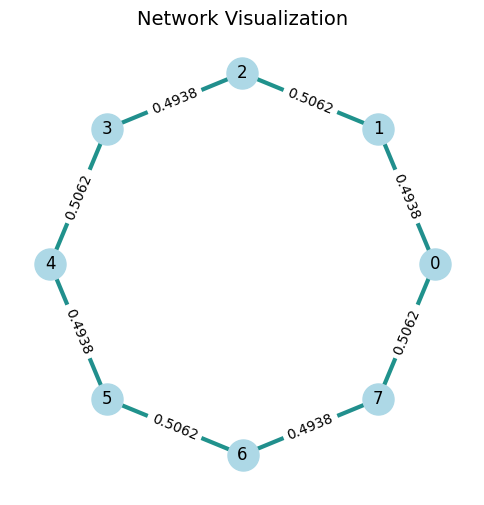

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# Define a colormap and positions for nodes
cmap = cm.viridis
pos = nx.circular_layout(nx.from_numpy_array(compute_ensemble_average(outputs_twentyfive_trials)))

# Call the visualize function
visualize_network(compute_ensemble_average(outputs_twentyfive_trials), ax, "Network Visualization", pos, cmap)

# Show the plot
plt.show()

Code to calculate the proportion of two choices (Choice 1 and Choice 2) at each time step. The function `calculate_choice_frequencies` computes the proportions and standard deviations for each choice across all trials.

In [95]:
# Function to calculate the proportion of two choices (Choice 1 and Choice 2) at each time step
def calculate_choice_frequencies(data):
    # Number of trials and time steps
    num_trials = len(data)
    num_time_steps =len(data[0])
    # Initializenp.arrays to store the proportions of Choice 1 and Choice 2
    proportion_choice_1 = np.zeros(num_time_steps)
    proportion_choice_2 = np.zeros(num_time_steps)
    distinct_neighbourhoods = get_distinct_neighbourhoods(data[1])

    std_choice_1 = np.zeros(num_time_steps)
    std_choice_2 = np.zeros(num_time_steps)

    # For each time step, calculate the proportion of Choice 1 and Choice 2
    for t in range(num_time_steps):
        choices_at_t = data[:, t]  # Get all choices at time step t (for all trials)
        proportion_choice_1[t] = np.mean(choices_at_t == distinct_neighbourhoods[0])  # Proportion of Choice 1 (e.g., 0)
        proportion_choice_2[t] = np.mean(choices_at_t == distinct_neighbourhoods[1])  # Proportion of Choice 2 (e.g., 1)

        std_choice_1[t] = np.std(choices_at_t == distinct_neighbourhoods[0])
        std_choice_2[t] = np.std(choices_at_t == distinct_neighbourhoods[1])

    return proportion_choice_1, proportion_choice_2, std_choice_1, std_choice_2

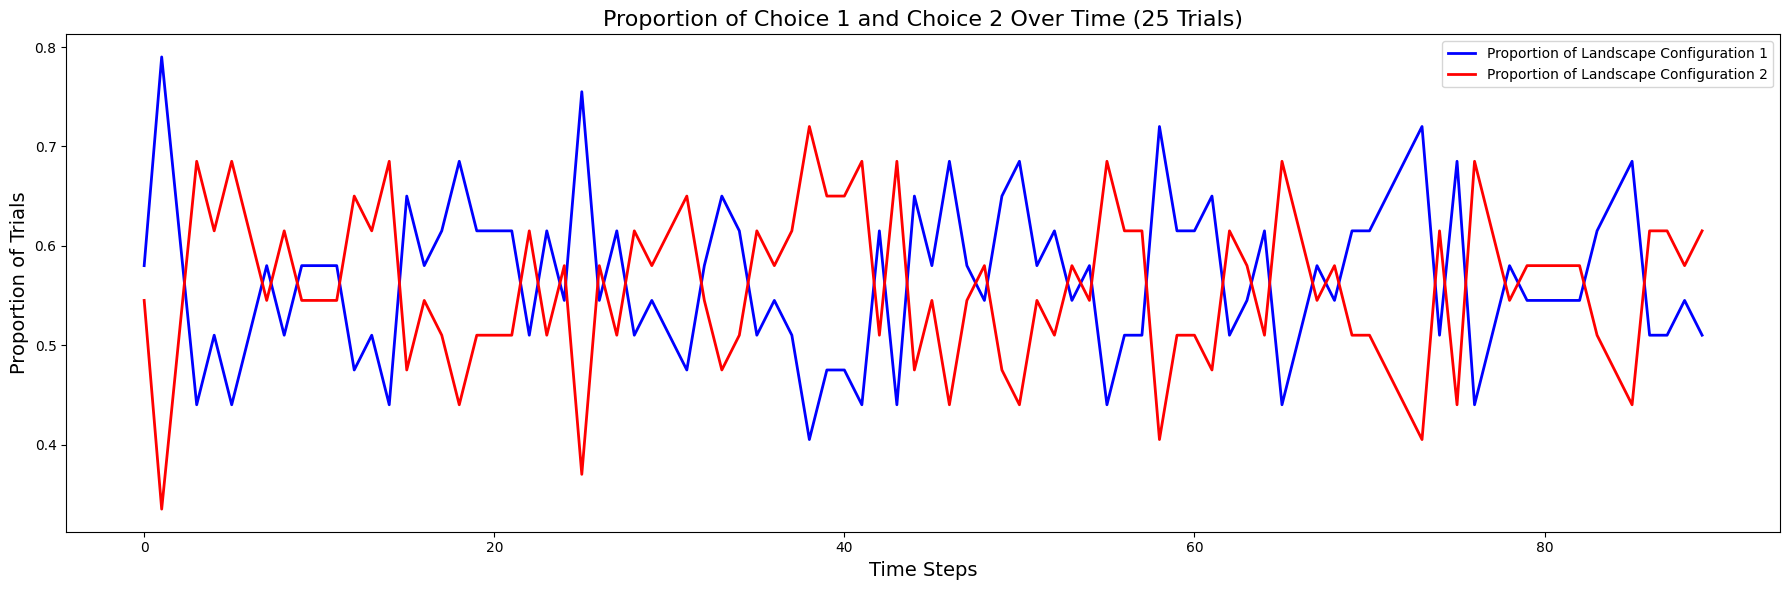

In [98]:
data =np.array(outputs_twentyfive_trials)
# 1. Calculate the proportions of Choice 1 and Choice 2 at each time step
proportion_choice_1, proportion_choice_2, std_choice_1, std_choice_2 = calculate_choice_frequencies(data)


# 2. Plot the results
plt.figure(figsize=(18, 6))

# Plot the proportion of Choice 1 and Choice 2
plt.plot(proportion_choice_1, label='Proportion of Landscape Configuration 1', color='blue', linewidth=2)
plt.plot(proportion_choice_2, label='Proportion of Landscape Configuration 2', color='red', linewidth=2)

#plt.fill_between(range(489), proportion_choice_1 - std_choice_1, proportion_choice_1 + std_choice_1, color='blue', alpha=0.2)
#plt.fill_between(range(489), proportion_choice_2 - std_choice_2, proportion_choice_2 + std_choice_2, color='red', alpha=0.2)


# Add labels and title
plt.xlabel('Time Steps', fontsize=14)
plt.ylabel('Proportion of Trials', fontsize=14)
plt.title('Proportion of Choice 1 and Choice 2 Over Time (25 Trials)', fontsize=16)

# Add a legend
plt.legend(loc='best')
#
# Display the plot
plt.tight_layout()
plt.show()